In [1]:
import numpy as np
import wandb
import pandas as pd

In [2]:
wandb.login()
api = wandb.Api(timeout=29)

wandb: Currently logged in as: tim-ba (swarmsl). Use `wandb login --relogin` to force relogin


In [3]:
strategies=["fed", "split", "swarm_seq", "swarm_rand", "swarm_max"]
batteries=["equal_batteries_only_flops", "unequal_batteries_only_flops", "equal_batteries_unlimited"]

In [4]:
run_groups = {}
for strategy in strategies:
    for battery in batteries:
        group = api.runs("tim-ba/baseline", filters={"group": f"{strategy}_{battery}"})
        run_groups[f"{strategy}_{battery}"] = group

In [5]:
communication_sizes = {}
for name, group in run_groups.items():    
    payload_size = 0
    for run in group:
        history_df = pd.DataFrame(run.scan_history())
        for col in history_df.columns:
            print(col)
            if col.startswith("/Device/"):
                payload_size += history_df[col].sum()
    communication_sizes[name] = payload_size

/Device/FullModelTraining_response_size
/Device/StartExperiment_response_size
client_evaluate_time
_step
_timestamp
/Device/FullModelTraining_request_size
battery
/Device/SetWeights_response_size
fed_train_time
train_accuracy
_runtime
val_accuracy
client_train_epoch_time
/Device/SetWeights_request_size
val_accuracy
_step
client_train_epoch_time
_runtime
fed_train_time
client_evaluate_time
/Device/SetWeights_request_size
/Device/FullModelTraining_response_size
_timestamp
train_accuracy
/Device/StartExperiment_response_size
battery
/Device/FullModelTraining_request_size
/Device/SetWeights_response_size
/Device/SetWeights_response_size
client_train_epoch_time
/Device/FullModelTraining_request_size
_step
train_accuracy
/Device/SetWeights_request_size
/Device/StartExperiment_response_size
val_accuracy
battery
_runtime
client_evaluate_time
fed_train_time
/Device/FullModelTraining_response_size
_timestamp
/Device/StartExperiment_response_size
_step
/Device/SetWeights_response_size
/Device/Ful

In [6]:
communication_sizes

{'fed_equal_batteries_only_flops': 480236160.0,
 'fed_unequal_batteries_only_flops': 461026730.0,
 'fed_equal_batteries_unlimited': 2401180740.0,
 'split_equal_batteries_only_flops': 22342901919.0,
 'split_unequal_batteries_only_flops': 28204101940.0,
 'split_equal_batteries_unlimited': 159592077305.0,
 'swarm_seq_equal_batteries_only_flops': 31965074916.0,
 'swarm_seq_unequal_batteries_only_flops': 28928048314.0,
 'swarm_seq_equal_batteries_unlimited': 159820568850.0,
 'swarm_rand_equal_batteries_only_flops': 31528249111.0,
 'swarm_rand_unequal_batteries_only_flops': 27544788384.0,
 'swarm_rand_equal_batteries_unlimited': 159820492125.0,
 'swarm_max_equal_batteries_only_flops': 31965076866.0,
 'swarm_max_unequal_batteries_only_flops': 29812824528.0,
 'swarm_max_equal_batteries_unlimited': 159823645350.0}

In [7]:
communication_sizes_gbyte = {name: value/1000000000 for name, value in communication_sizes.items()}
communication_sizes_gbyte

{'fed_equal_batteries_only_flops': 0.48023616,
 'fed_unequal_batteries_only_flops': 0.46102673,
 'fed_equal_batteries_unlimited': 2.40118074,
 'split_equal_batteries_only_flops': 22.342901919,
 'split_unequal_batteries_only_flops': 28.20410194,
 'split_equal_batteries_unlimited': 159.592077305,
 'swarm_seq_equal_batteries_only_flops': 31.965074916,
 'swarm_seq_unequal_batteries_only_flops': 28.928048314,
 'swarm_seq_equal_batteries_unlimited': 159.82056885,
 'swarm_rand_equal_batteries_only_flops': 31.528249111,
 'swarm_rand_unequal_batteries_only_flops': 27.544788384,
 'swarm_rand_equal_batteries_unlimited': 159.820492125,
 'swarm_max_equal_batteries_only_flops': 31.965076866,
 'swarm_max_unequal_batteries_only_flops': 29.812824528,
 'swarm_max_equal_batteries_unlimited': 159.82364535}

In [8]:
batteries = ["equal", "heterogeneous", "unlimited"]
groups = {"equal": [], "heterogeneous": [], "unlimited": []}
for idx, (method, size) in enumerate(communication_sizes_gbyte.items()):
    groups[batteries[idx % 3]].append(size)
groups

{'equal': [0.48023616, 22.342901919, 31.965074916, 31.528249111, 31.965076866],
 'heterogeneous': [0.46102673,
  28.20410194,
  28.928048314,
  27.544788384,
  29.812824528],
 'unlimited': [2.40118074,
  159.592077305,
  159.82056885,
  159.820492125,
  159.82364535]}

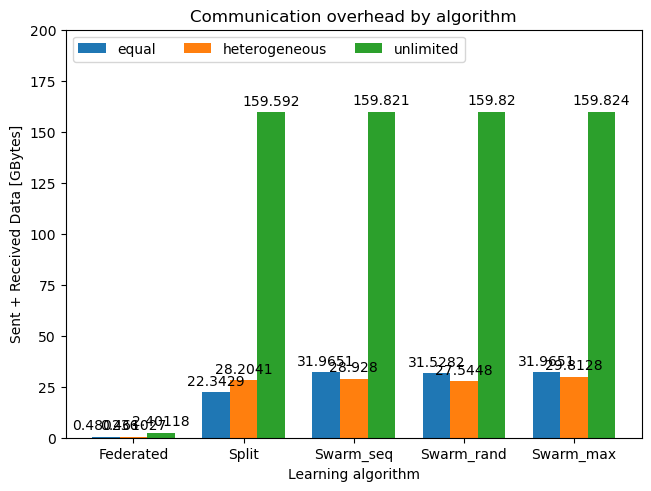

In [9]:
# adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
import matplotlib.pyplot as plt

strategies=["Federated", "Split", "Swarm_seq", "Swarm_rand", "Swarm_max"]

x = np.arange(len(strategies))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in groups.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel('Learning algorithm')
ax.set_ylabel('Sent + Received Data [GBytes]')
ax.set_title('Communication overhead by algorithm')
ax.set_xticks(x + width, strategies)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)

plt.show()

In [10]:
run_groups.keys()

dict_keys(['fed_equal_batteries_only_flops', 'fed_unequal_batteries_only_flops', 'fed_equal_batteries_unlimited', 'split_equal_batteries_only_flops', 'split_unequal_batteries_only_flops', 'split_equal_batteries_unlimited', 'swarm_seq_equal_batteries_only_flops', 'swarm_seq_unequal_batteries_only_flops', 'swarm_seq_equal_batteries_unlimited', 'swarm_rand_equal_batteries_only_flops', 'swarm_rand_unequal_batteries_only_flops', 'swarm_rand_equal_batteries_unlimited', 'swarm_max_equal_batteries_only_flops', 'swarm_max_unequal_batteries_only_flops', 'swarm_max_equal_batteries_unlimited'])

In [11]:
def dpm(method):
    data_per_method = {}
    for run in run_groups[method]:
        history_df = pd.DataFrame(run.scan_history())
        for col in history_df.columns:
            if col.startswith("/Device/"):
                if col in data_per_method.keys():
                    data_per_method[col] += history_df[col].sum()
                else:
                    data_per_method[col] = history_df[col].sum()
    return data_per_method

def dpd(method):
    data_per_device = {}
    for run in run_groups[method]:
        history_df = pd.DataFrame(run.scan_history())
        for col in history_df.columns:
            if col.startswith("/Device/"):
                if col in data_per_device.keys():
                    data_per_device[col].append(history_df[col].sum())
                else:
                    data_per_device[col] = [history_df[col].sum()]
    return data_per_device

In [12]:
pd.DataFrame.from_dict(dpd('swarm_max_equal_batteries_only_flops'), orient='index')

0             1  \
/Device/GetBatteryStatus_response_size  7.500000e+02  7.000000e+02   
/Device/TrainEpoch_response_size        6.137760e+05  6.137760e+05   
/Device/Evaluate_response_size          4.000000e+01  4.000000e+01   
/Device/TrainBatch_request_size         2.832800e+09  2.832800e+09   
/Device/EvaluateBatch_request_size      7.082035e+08  7.082035e+08   
/Device/TrainBatch_response_size        2.831694e+09  2.831694e+09   
/Device/EvaluateBatch_response_size     1.520000e+03  1.520000e+03   
/Device/SetWeights_request_size         1.006521e+07  1.006524e+07   
/Device/EndExperiment_request_size      5.000000e+00           NaN   
/Device/StartExperiment_response_size   5.000000e+00  5.000000e+00   
/Device/SetWeights_response_size        5.000000e+01  6.000000e+01   
/Device/GetBatteryStatus_request_size   1.500000e+02  1.400000e+02   
/Device/TrainEpoch_request_size         2.240000e+02  2.240000e+02   
/Device/TrainGlobal_request_size        1.400000e+01  2.100000e+01   
/Device/TrainGlobal_response_size       9.604898e+06  9.604890e+06   
/Device/Evaluate_request_size           2.400000e+02  2.400000e+02   

                                                   2             3  \
/Device/GetBatteryStatus_response_size  6.500000e+02  6.000000e+02   
/Device/TrainEpoch_response_size        6.137760e+05  6.137760e+05   
/Device/Evaluate_response_size          4.000000e+01  4.000000e+01   
/Device/TrainBatch_request_size         2.832800e+09  2.832800e+09   
/Device/EvaluateBatch_request_size      7.082035e+08  7.082035e+08   
/Device/TrainBatch_response_size        2.831694e+09  2.831694e+09   
/Device/EvaluateBatch_response_size     1.520000e+03  1.520000e+03   
/Device/SetWeights_request_size         1.006524e+07  1.006524e+07   
/Device/EndExperiment_request_size               NaN           NaN   
/Device/StartExperiment_response_size   5.000000e+00  5.000000e+00   
/Device/SetWeights_response_size        6.000000e+01  6.000000e+01   
/Device/GetBatteryStatus_request_size   1.300000e+02  1.200000e+02   
/Device/TrainEpoch_request_size         2.240000e+02  2.240000e+02   
/Device/TrainGlobal_request_size        2.100000e+01  2.100000e+01   
/Device/TrainGlobal_response_size       9.604890e+06  9.604890e+06   
/Device/Evaluate_request_size           2.400000e+02  2.400000e+02   

                                                   4  
/Device/GetBatteryStatus_response_size  5.500000e+02  
/Device/TrainEpoch_response_size        6.137760e+05  
/Device/Evaluate_response_size          4.000000e+01  
/Device/TrainBatch_request_size         2.832800e+09  
/Device/EvaluateBatch_request_size      7.082035e+08  
/Device/TrainBatch_response_size        2.831694e+09  
/Device/EvaluateBatch_response_size     1.520000e+03  
/Device/SetWeights_request_size         1.021859e+07  
/Device/EndExperiment_request_size               NaN  
/Device/StartExperiment_response_size   5.000000e+00  
/Device/SetWeights_response_size        7.000000e+01  
/Device/GetBatteryStatus_request_size   1.100000e+02  
/Device/TrainEpoch_request_size         2.240000e+02  
/Device/TrainGlobal_request_size        2.100000e+01  
/Device/TrainGlobal_response_size       9.604890e+06  
/Device/Evaluate_request_size           2.400000e+02

In [13]:
pd.DataFrame.from_dict(dpd('swarm_seq_equal_batteries_only_flops'), orient='index')

0             1  \
/Device/StartExperiment_response_size   5.000000e+00  5.000000e+00   
/Device/EvaluateBatch_response_size     1.520000e+03  1.520000e+03   
/Device/TrainEpoch_request_size         2.240000e+02  2.240000e+02   
/Device/TrainGlobal_response_size       9.604898e+06  9.604890e+06   
/Device/TrainGlobal_request_size        1.400000e+01  2.100000e+01   
/Device/SetWeights_response_size        5.000000e+01  6.000000e+01   
/Device/TrainBatch_request_size         2.832800e+09  2.832800e+09   
/Device/EvaluateBatch_request_size      7.082035e+08  7.082035e+08   
/Device/TrainEpoch_response_size        6.137760e+05  6.137760e+05   
/Device/Evaluate_request_size           2.400000e+02  2.400000e+02   
/Device/SetWeights_request_size         1.006521e+07  1.006524e+07   
/Device/Evaluate_response_size          4.000000e+01  4.000000e+01   
/Device/TrainBatch_response_size        2.831694e+09  2.831694e+09   
/Device/GetBatteryStatus_request_size   7.500000e+01  7.000000e+01   
/Device/EndExperiment_request_size      5.000000e+00           NaN   
/Device/GetBatteryStatus_response_size  3.750000e+02  3.500000e+02   

                                                   2             3  \
/Device/StartExperiment_response_size   5.000000e+00  5.000000e+00   
/Device/EvaluateBatch_response_size     1.520000e+03  1.520000e+03   
/Device/TrainEpoch_request_size         2.240000e+02  2.240000e+02   
/Device/TrainGlobal_response_size       9.604890e+06  9.604890e+06   
/Device/TrainGlobal_request_size        2.100000e+01  2.100000e+01   
/Device/SetWeights_response_size        6.000000e+01  6.000000e+01   
/Device/TrainBatch_request_size         2.832800e+09  2.832800e+09   
/Device/EvaluateBatch_request_size      7.082035e+08  7.082035e+08   
/Device/TrainEpoch_response_size        6.137760e+05  6.137760e+05   
/Device/Evaluate_request_size           2.400000e+02  2.400000e+02   
/Device/SetWeights_request_size         1.006524e+07  1.006524e+07   
/Device/Evaluate_response_size          4.000000e+01  4.000000e+01   
/Device/TrainBatch_response_size        2.831694e+09  2.831694e+09   
/Device/GetBatteryStatus_request_size   6.500000e+01  6.000000e+01   
/Device/EndExperiment_request_size               NaN           NaN   
/Device/GetBatteryStatus_response_size  3.250000e+02  3.000000e+02   

                                                   4  
/Device/StartExperiment_response_size   5.000000e+00  
/Device/EvaluateBatch_response_size     1.520000e+03  
/Device/TrainEpoch_request_size         2.240000e+02  
/Device/TrainGlobal_response_size       9.604890e+06  
/Device/TrainGlobal_request_size        2.100000e+01  
/Device/SetWeights_response_size        7.000000e+01  
/Device/TrainBatch_request_size         2.832800e+09  
/Device/EvaluateBatch_request_size      7.082035e+08  
/Device/TrainEpoch_response_size        6.137760e+05  
/Device/Evaluate_request_size           2.400000e+02  
/Device/SetWeights_request_size         1.021859e+07  
/Device/Evaluate_response_size          4.000000e+01  
/Device/TrainBatch_response_size        2.831694e+09  
/Device/GetBatteryStatus_request_size   5.500000e+01  
/Device/EndExperiment_request_size               NaN  
/Device/GetBatteryStatus_response_size  2.750000e+02

In [14]:
dpm('swarm_max_equal_batteries_unlimited')

{'/Device/GetBatteryStatus_response_size': 12500.0,
 '/Device/SetWeights_response_size': 1500.0,
 '/Device/Evaluate_request_size': 6000.0,
 '/Device/StartExperiment_response_size': 25.0,
 '/Device/Evaluate_response_size': 1000.0,
 '/Device/TrainEpoch_response_size': 15344400.0,
 '/Device/EndExperiment_request_size': 25.0,
 '/Device/GetBatteryStatus_request_size': 2500.0,
 '/Device/SetWeights_request_size': 250663400.0,
 '/Device/TrainEpoch_request_size': 5600.0,
 '/Device/EvaluateBatch_request_size': 17705087800.0,
 '/Device/TrainBatch_response_size': 70792350000.0,
 '/Device/TrainBatch_request_size': 70820010000.0,
 '/Device/EvaluateBatch_response_size': 38000.0,
 '/Device/TrainGlobal_response_size': 240122250.0,
 '/Device/TrainGlobal_request_size': 350.0}

In [15]:
dpm('split_equal_batteries_unlimited')

{'/Device/SetWeights_response_size': 1250.0,
 '/Device/TrainEpoch_response_size': 15344400.0,
 '/Device/Evaluate_request_size': 6000.0,
 '/Device/EndExperiment_request_size': 25.0,
 '/Device/GetBatteryStatus_response_size': 6250.0,
 '/Device/SetWeights_request_size': 19103105.0,
 '/Device/GetBatteryStatus_request_size': 1250.0,
 '/Device/Evaluate_response_size': 1000.0,
 '/Device/TrainEpoch_request_size': 5600.0,
 '/Device/StartExperiment_response_size': 25.0,
 '/Device/EvaluateBatch_request_size': 17705087800.0,
 '/Device/EvaluateBatch_response_size': 38000.0,
 '/Device/TrainGlobal_request_size': 350.0,
 '/Device/TrainBatch_response_size': 70792350000.0,
 '/Device/TrainGlobal_response_size': 240122250.0,
 '/Device/TrainBatch_request_size': 70820010000.0}

In [ ]:
dpm('swarm_seq_equal_batteries_unlimited')

In [ ]:
import pandas as pd
methods = ['swarm_seq_equal_batteries_unlimited', 'swarm_rand_equal_batteries_unlimited', 'split_equal_batteries_unlimited', 'swarm_max_equal_batteries_unlimited']
times_dict = {}
for m in methods:
    times = dpm(m)
    for measurement in times:
        if measurement in times_dict.keys():
            times_dict[measurement].append(times[measurement])
        else:
            times_dict[measurement] = [times[measurement]]

timetable = pd.DataFrame.from_dict(times_dict)

In [ ]:
timetable